In [50]:
import numpy as ny
import pandas as ps
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [2]:
data= data = ps.read_csv(r'spam.csv', encoding='latin-1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## EDA

In [4]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.columns = ['label', 'text']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
stop_words = list(stopwords.words('english'))

In [18]:
def get_frequent_ngrams(texts, n=1):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [19]:
spam = data[data['label'] == 'spam']
ham = data[data['label'] == 'ham']

In [20]:
frequent_words_spam = get_frequent_ngrams(spam['text'], 1)
frequent_bigrams_spam = get_frequent_ngrams(spam['text'], 2)
frequent_trigrams_spam = get_frequent_ngrams(spam['text'], 3)

In [21]:
frequent_words_ham = get_frequent_ngrams(ham['text'], 1)
frequent_bigrams_ham = get_frequent_ngrams(ham['text'], 2)
frequent_trigrams_ham = get_frequent_ngrams(ham['text'], 3)

In [24]:
def create_wordcloud(text):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

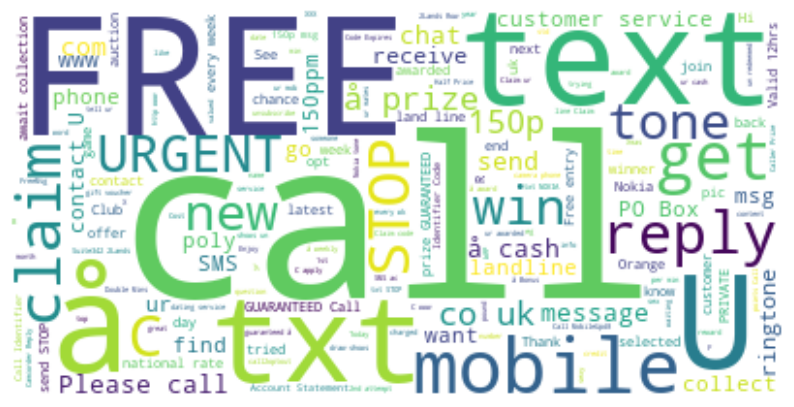

In [25]:
create_wordcloud(spam['text'])

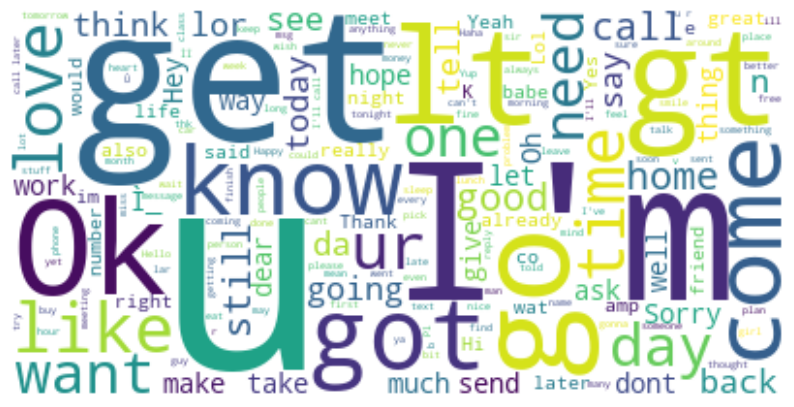

In [27]:
create_wordcloud(ham['text'])

## BAG OF WORDS

In [34]:
LE= LabelEncoder()
yz=LE.fit_transform(data['label'])
yz

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
# Convert text to Bag-of-Words vectors
vectorizer = CountVectorizer(stop_words=stop_words)
X_bow = vectorizer.fit_transform(data['text'])
y = data['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2)

In [37]:
# Train the model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
# Predict and evaluate
y_pred = model.predict(X_test)
f1_bow = f1_score(y_test, y_pred)

In [39]:
print(f'F1-score using Bag-of-Words: {f1_bow}')

F1-score using Bag-of-Words: 0.910394265232975


## Tf-IDF Vectors

In [42]:
# Convert text to Tf-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)


In [47]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
# Predict and evaluate
y_pred = model.predict(X_test)
f1_tfidf = f1_score(y_test, y_pred)

print(f'F1-score using Tf-IDF: {f1_tfidf}')

F1-score using Tf-IDF: 0.9230769230769231


## With PRE PROCESSING

In [58]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...


True

In [59]:
lemmatizer = WordNetLemmatizer()

In [60]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Remove email-ids, urls, html tags, numbers, and punctuation
    tokens = [re.sub(r'\b\w+@\w+\.\w+\b', '', token) for token in tokens]
    tokens = [re.sub(r'http\S+|www\S+', '', token) for token in tokens]
    tokens = [re.sub(r'<.*?>', '', token) for token in tokens]
    tokens = [re.sub(r'\d+', '', token) for token in tokens]
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Lemmatize each token
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(preprocess_text)

In [61]:
data

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n grea...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u å pound prize cla...
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like d interested buying so...


In [66]:
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_preprocessed, y, test_size=0.2)


In [67]:
# Train the model
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
# Predict and evaluate
y_pred = model.predict(X_test)
f1_tfidf_preprocessed = f1_score(y_test, y_pred)

print(f'F1-score using Tf-IDF with preprocessing: {f1_tfidf_preprocessed}')



F1-score using Tf-IDF with preprocessing: 0.9241379310344828


In [72]:
# List Scores
print(f'F1-score using Bag-of-Words: {f1_bow}')
print(f'F1-score using Tf-IDF: {f1_tfidf}')
print(f'F1-score using Tf-IDF with preprocessing: {f1_tfidf_preprocessed}')

F1-score using Bag-of-Words: 0.910394265232975
F1-score using Tf-IDF: 0.9230769230769231
F1-score using Tf-IDF with preprocessing: 0.9241379310344828
